In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dc_bike_daily = pd.read_csv('CBS_2021-2023_Daily_Weather.csv', sep=',')


In [98]:
dc_bike_daily

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8


In [99]:
dc_bike_daily.info

<bound method DataFrame.info of       Casual        Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0        371  2021-01-01     590          961                            -0.9   
1       2874  2021-01-02    2844         5718                             4.8   
2        495  2021-01-03    1133         1628                             0.9   
3        907  2021-01-04    2074         2981                             1.0   
4       1057  2021-01-05    2004         3061                             1.4   
...      ...         ...     ...          ...                             ...   
1090     646  2023-12-27    1934         2580                            -8.6   
1091    3099  2023-12-28    4819         7918                            -7.0   
1092    3491  2023-12-29    5168         8659                            -7.8   
1093    3097  2023-12-30    4497         7594                            -7.3   
1094    2839  2023-12-31    4488         7327                            -8.9

In [100]:
pd.concat([dc_bike_daily.describe()], axis=1, keys=["DC Hourly Ride"])

DC Hourly Ride                              \
              Casual        Member   Total_rides   
count    1095.000000   1095.000000   1095.000000   
mean     3836.715068   5929.492237   9766.207306   
std      2114.895305   2419.273171   4129.630135   
min       174.000000    323.000000    497.000000   
25%      2122.000000   4292.500000   6741.500000   
50%      3595.000000   5848.000000   9759.000000   
75%      5321.000000   7577.000000  13020.000000   
max     12839.000000  12580.000000  20174.000000   

                                                               \
      apparent_temperature_mean (°C) temperature_2m_mean (°C)   
count                    1095.000000              1095.000000   
mean                       12.836438                14.412785   
std                        11.889420                 9.667675   
min                       -15.200000                -9.100000   
25%                         2.700000                 6.250000   
50%                        13.100000                14.900000   
75%                        23.400000                22.750000   
max                        34.700000                34.700000   

                                                       
      weathercode (wmo code) windspeed_10m_max (km/h)  
count            1095.000000              1095.000000  
mean               24.391781                16.051050  
std                27.774440                 5.880358  
min                 0.000000                 5.600000  
25%                 1.000000                11.700000  
50%                 3.000000                14.700000  
75%                53.000000                19.400000  
max                75.000000                40.100000

In [101]:
dc_bike_daily.dropna(inplace=True)

In [102]:
dc_bike_daily.dtypes

Casual                              int64
Date                               object
Member                              int64
Total_rides                         int64
apparent_temperature_mean (°C)    float64
temperature_2m_mean (°C)          float64
weathercode (wmo code)              int64
windspeed_10m_max (km/h)          float64
dtype: object

In [104]:
unique_values = dc_bike_daily.nunique()
print("Unique values:\n", unique_values, '\n')

Unique values:
 Casual                            1010
Date                              1095
Member                            1034
Total_rides                       1042
apparent_temperature_mean (°C)     398
temperature_2m_mean (°C)           350
weathercode (wmo code)              13
windspeed_10m_max (km/h)           239
dtype: int64 



In [105]:
dc_bike_daily.isnull().sum()

Casual                            0
Date                              0
Member                            0
Total_rides                       0
apparent_temperature_mean (°C)    0
temperature_2m_mean (°C)          0
weathercode (wmo code)            0
windspeed_10m_max (km/h)          0
dtype: int64

In [106]:
dc_bike_daily['Date']= pd.to_datetime(dc_bike_daily['Date'])
dc_bike_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   windspeed_10m_max (km/h)        1095 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 68.6 KB


In [107]:
# Extracting year, month, and day
dc_bike_daily['Date_year'] = dc_bike_daily['Date'].dt.year
dc_bike_daily['Date_month_no'] = dc_bike_daily['Date'].dt.month
dc_bike_daily['Date_day'] = dc_bike_daily['Date'].dt.day

# Displaying the updated DataFrame
print(dc_bike_daily.head())

   Casual       Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371 2021-01-01     590          961                            -0.9   
1    2874 2021-01-02    2844         5718                             4.8   
2     495 2021-01-03    1133         1628                             0.9   
3     907 2021-01-04    2074         2981                             1.0   
4    1057 2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  \
0                       2.3                      63                      10.6   
1                       7.6                      61                      19.1   
2                       3.9                      63                      13.0   
3                       4.1                       3                      13.3   
4                       4.0                      51                       9.2   

   Date_year  Date_month_no  Date_day  
0       20

In [108]:
# Extracting month and day names
dc_bike_daily['Date_month_name'] = dc_bike_daily['Date'].dt.month_name()
dc_bike_daily['Date_dow_name'] = dc_bike_daily['Date'].dt.day_name()

# Displaying the updated DataFrame
print(dc_bike_daily.head())

   Casual       Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371 2021-01-01     590          961                            -0.9   
1    2874 2021-01-02    2844         5718                             4.8   
2     495 2021-01-03    1133         1628                             0.9   
3     907 2021-01-04    2074         2981                             1.0   
4    1057 2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  \
0                       2.3                      63                      10.6   
1                       7.6                      61                      19.1   
2                       3.9                      63                      13.0   
3                       4.1                       3                      13.3   
4                       4.0                      51                       9.2   

   Date_year  Date_month_no  Date_day Date_month_n

In [109]:
# Extracting day of the week and week number
dc_bike_daily['Date_dow'] = dc_bike_daily['Date'].dt.dayofweek
dc_bike_daily['Date_week'] = dc_bike_daily['Date'].dt.isocalendar().week

# Displaying the updated DataFrame
print(dc_bike_daily.head())

   Casual       Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371 2021-01-01     590          961                            -0.9   
1    2874 2021-01-02    2844         5718                             4.8   
2     495 2021-01-03    1133         1628                             0.9   
3     907 2021-01-04    2074         2981                             1.0   
4    1057 2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  \
0                       2.3                      63                      10.6   
1                       7.6                      61                      19.1   
2                       3.9                      63                      13.0   
3                       4.1                       3                      13.3   
4                       4.0                      51                       9.2   

   Date_year  Date_month_no  Date_day Date_month_n

In [110]:
# Checking if the date is a weekend
dc_bike_daily['Date_is_weekend'] = np.where(dc_bike_daily['Date_dow_name'].isin(['Sunday', 'Saturday']), 1, 0)

# Displaying the updated DataFrame
print(dc_bike_daily.head())

   Casual       Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371 2021-01-01     590          961                            -0.9   
1    2874 2021-01-02    2844         5718                             4.8   
2     495 2021-01-03    1133         1628                             0.9   
3     907 2021-01-04    2074         2981                             1.0   
4    1057 2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  \
0                       2.3                      63                      10.6   
1                       7.6                      61                      19.1   
2                       3.9                      63                      13.0   
3                       4.1                       3                      13.3   
4                       4.0                      51                       9.2   

   Date_year  Date_month_no  Date_day Date_month_n

In [111]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=dc_bike_daily['Date'].min(), end=dc_bike_daily['Date'].max())
dc_bike_daily['Holiday'] = dc_bike_daily['Date'].isin(holidays)
dc_bike_daily

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Date_year,Date_month_no,Date_day,Date_month_name,Date_dow_name,Date_dow,Date_week,Date_is_weekend,Holiday
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,2021,1,1,January,Friday,4,53,0,True
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2021,1,2,January,Saturday,5,53,1,False
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,2021,1,3,January,Sunday,6,53,1,False
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,2021,1,4,January,Monday,0,1,0,False
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,2021,1,5,January,Tuesday,1,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,2023,12,27,December,Wednesday,2,52,0,False
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,2023,12,28,December,Thursday,3,52,0,False
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,2023,12,29,December,Friday,4,52,0,False
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,2023,12,30,December,Saturday,5,52,1,False


In [112]:
# Define bin edges and labels based on WMO weather codes
bins = [0, 4, 20, 40, 50, 60, 70, 80, 90, 100]
labels = [
    "Clear/Cloudy", 
    "Atmospheric Obstructions", 
    "Fog Conditions", 
    "Drizzle", 
    "Rain", 
    "Snow", 
    "Showers", 
    "Thunderstorms",
    "Extreme Weather"
]

In [113]:
# Define humidity bins and labels
humidity_bins = [0, 30, 60, 80, 100]
humidity_labels = ['Low', 'Moderate', 'High', 'Very High']


In [114]:
# Define windspeed bins and labels
windspeed_bins = [0, 5, 20, 39, 61, float('inf')]
windspeed_labels = ['Calm', 'Light Breeze', 'Moderate Breeze', 'Strong Breeze', 'High Wind']

In [117]:
# Ensure the columns are numeric before processing
#dc_bike_daily['relativehumidity_2m (%))'] = pd.to_numeric(dc_bike_daily['relativehumidity_2m (%)'], errors='coerce')
dc_bike_daily['windspeed_10m_max (km/h)'] = pd.to_numeric(dc_bike_daily['windspeed_10m_max (km/h)'], errors='coerce')
dc_bike_daily['weathercode (wmo code)'] = pd.to_numeric(dc_bike_daily['weathercode (wmo code)'], errors='coerce')

In [119]:
# Apply binning to relevant columns
dc_bike_daily['weather_category'] = pd.cut(
    dc_bike_daily['weathercode (wmo code)'], 
    bins=bins, 
    labels=labels, 
    right=False, 
    include_lowest=True
)

In [123]:
dc_bike_daily['windspeed_category'] = pd.cut(
    dc_bike_daily['windspeed_10m_max (km/h)'], 
    bins=windspeed_bins, 
    labels=windspeed_labels, 
    right=True, 
    include_lowest=True
)

# Display results
print(dc_bike_daily[['windspeed_10m_max (km/h)', 'windspeed_category']].head())

   windspeed_10m_max (km/h) windspeed_category
0                      10.6       Light Breeze
1                      19.1       Light Breeze
2                      13.0       Light Breeze
3                      13.3       Light Breeze
4                       9.2       Light Breeze


In [124]:
dc_bike_daily['Season'] = dc_bike_daily['Date_month_no'].apply(lambda value: 'winter'if value in (12, 1, 2)
                                                                 else 'Spring'if value in (3, 4, 5) 
                                                                 else 'Summer'if value in (6, 7, 8) 
                                                                 else 'Fall' )


In [125]:
dc_bike_daily

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Date_year,Date_month_no,Date_day,Date_month_name,Date_dow_name,Date_dow,Date_week,Date_is_weekend,Holiday,weather_category,windspeed_category,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,2021,1,1,January,Friday,4,53,0,True,Snow,Light Breeze,winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2021,1,2,January,Saturday,5,53,1,False,Snow,Light Breeze,winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,2021,1,3,January,Sunday,6,53,1,False,Snow,Light Breeze,winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,2021,1,4,January,Monday,0,1,0,False,Clear/Cloudy,Light Breeze,winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,2021,1,5,January,Tuesday,1,1,0,False,Rain,Light Breeze,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,2023,12,27,December,Wednesday,2,52,0,False,Showers,Light Breeze,winter
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,2023,12,28,December,Thursday,3,52,0,False,Clear/Cloudy,Light Breeze,winter
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,2023,12,29,December,Friday,4,52,0,False,Clear/Cloudy,Light Breeze,winter
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,2023,12,30,December,Saturday,5,52,1,False,Clear/Cloudy,Light Breeze,winter


In [135]:
def skip(n):
    """Generate a random number with the same distribution as min({r_0, ... r_n})"""
    r = numpy.random.uniform()
    return 1.0 - (1.0 - r) ** (1.0 / n)

def sample(T, n):
    """Take n items from a list of size T"""
    t = T
    i = 0
    while t > 0 and n > 0:
        s = skip(n) * (t - n + 1)
        i += s
        yield int(i) % T
        i += 1
        t -= s + 1
        n -= 1

In [136]:
dc_bike_daily

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Date_year,Date_month_no,Date_day,Date_month_name,Date_dow_name,Date_dow,Date_week,Date_is_weekend,Holiday,weather_category,windspeed_category,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,2021,1,1,January,Friday,4,53,0,True,Snow,Light Breeze,winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2021,1,2,January,Saturday,5,53,1,False,Snow,Light Breeze,winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,2021,1,3,January,Sunday,6,53,1,False,Snow,Light Breeze,winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,2021,1,4,January,Monday,0,1,0,False,Clear/Cloudy,Light Breeze,winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,2021,1,5,January,Tuesday,1,1,0,False,Rain,Light Breeze,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,2023,12,27,December,Wednesday,2,52,0,False,Showers,Light Breeze,winter
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,2023,12,28,December,Thursday,3,52,0,False,Clear/Cloudy,Light Breeze,winter
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,2023,12,29,December,Friday,4,52,0,False,Clear/Cloudy,Light Breeze,winter
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,2023,12,30,December,Saturday,5,52,1,False,Clear/Cloudy,Light Breeze,winter


In [145]:
#importing the random module
import random 
#defining the population from where sample will be created
Date_year = list(range(1, 100)) 
#defining the size of sample
sample_size = 10 
#perform simple random sampling by using the random.sample() function
sample = random.sample(Date_year, sample_size) 
#it will print 10 random numbers within the range provided
print("Simple random sampling of 10 numbers are: ", sample) 

Simple random sampling of 10 numbers are:  [99, 49, 13, 3, 66, 73, 37, 80, 96, 11]


In [147]:
dc_bike_daily

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Date_year,Date_month_no,Date_day,Date_month_name,Date_dow_name,Date_dow,Date_week,Date_is_weekend,Holiday,weather_category,windspeed_category,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,2021,1,1,January,Friday,4,53,0,True,Snow,Light Breeze,winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2021,1,2,January,Saturday,5,53,1,False,Snow,Light Breeze,winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,2021,1,3,January,Sunday,6,53,1,False,Snow,Light Breeze,winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,2021,1,4,January,Monday,0,1,0,False,Clear/Cloudy,Light Breeze,winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,2021,1,5,January,Tuesday,1,1,0,False,Rain,Light Breeze,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,2023,12,27,December,Wednesday,2,52,0,False,Showers,Light Breeze,winter
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,2023,12,28,December,Thursday,3,52,0,False,Clear/Cloudy,Light Breeze,winter
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,2023,12,29,December,Friday,4,52,0,False,Clear/Cloudy,Light Breeze,winter
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,2023,12,30,December,Saturday,5,52,1,False,Clear/Cloudy,Light Breeze,winter


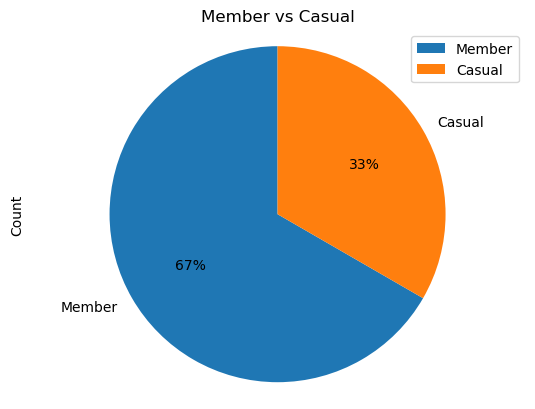

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
dc_bikedaily = {'Category': ['Member', 'Casual'], 'Count': [100, 50]}
dc_bikedaily = pd.DataFrame(dc_bikedaily)

# Plotting the pie chart
dc_bikedaily.plot(kind='pie', y='Count', labels=dc_bikedaily['Category'], autopct='%1.0f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Member vs Casual')
plt.show()

<Axes: xlabel='Season', ylabel='Casual'>

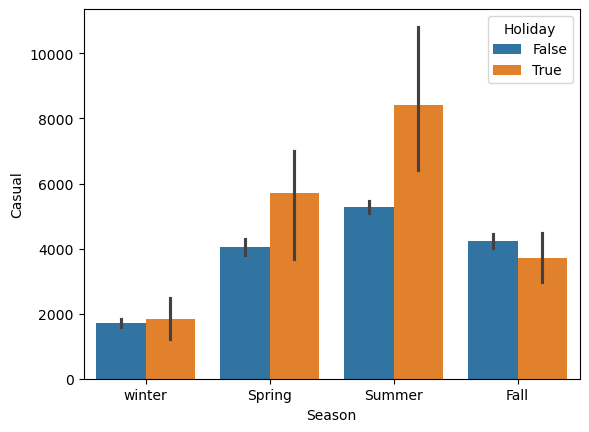

In [126]:
sns.barplot(dc_bike_daily, x="Season", y="Casual", hue="Holiday")

<Axes: xlabel='Season', ylabel='Member'>

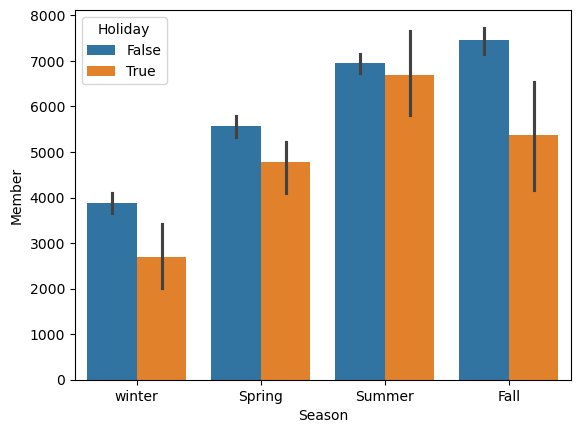

In [127]:
sns.barplot(dc_bike_daily, x="Season", y="Member", hue="Holiday")

<Axes: xlabel='Date_dow_name', ylabel='Total_rides'>

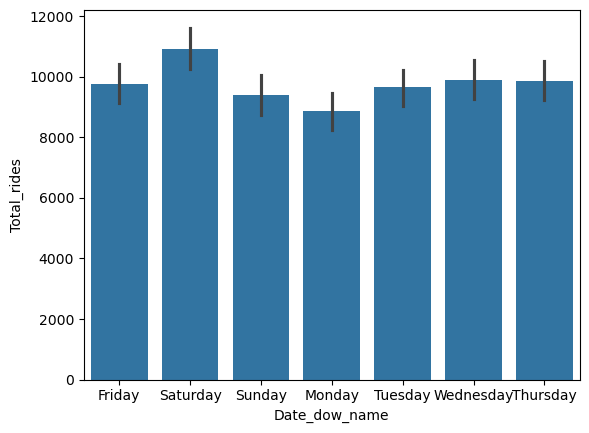

In [128]:
sns.barplot(dc_bike_daily, x="Date_dow_name", y="Total_rides")

<Axes: xlabel='Date_year', ylabel='Total_rides'>

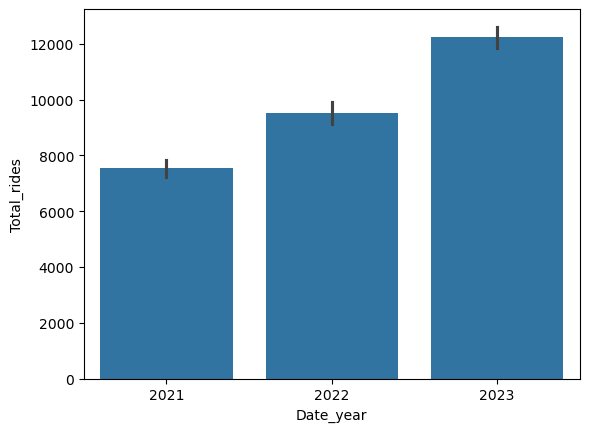

In [129]:
sns.barplot(dc_bike_daily, x="Date_year", y="Total_rides")

<Axes: xlabel='Date_day', ylabel='Total_rides'>

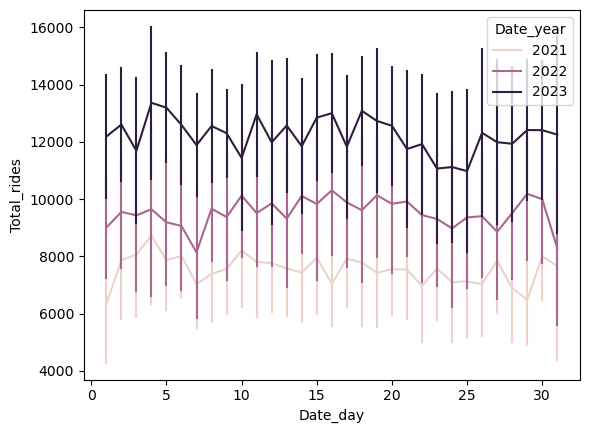

In [ ]:
sns.lineplot(
    data=dc_bike_daily, x="", y="Total_rides", hue="Date_year", err_style="bars", errorbar=("se", 2),
)